In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import folium
import streamlit as st


In [4]:
data = pd.read_csv("UK_Accident.csv")
data.head()

,Unnamed: 0,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,-0.191170,51.489096,2,1,1,4/1/05,3,17:42,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,1,200501BS00002,-0.211708,51.520075,3,1,1,5/1/05,4,17:36,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,2,200501BS00003,-0.206458,51.525301,3,2,1,6/1/05,5,0:15,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,3,200501BS00004,-0.173862,51.482442,3,1,1,7/1/05,6,10:35,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,4,200501BS00005,-0.156618,51.495752,3,1,1,10/1/05,2,21:13,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [6]:
import pandas as pd

data = pd.read_csv('UK_Accident.csv')

print("Missing Values in Each Column:")
print(data.isnull().sum())

data.dropna(subset=['Accident_Severity', 'Weather_Conditions'], inplace=True)

data['Junction_Control'].fillna('Unknown', inplace=True)
data['Special_Conditions_at_Site'].fillna(0, inplace=True)
data['Carriageway_Hazards'].fillna(0, inplace=True)


data['Time'].fillna('00:00:00', inplace=True)



data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data['Time'] = pd.to_datetime(data['Time'], errors='coerce').dt.time


print("Missing Values After Cleaning:")
print(data.isnull().sum())


data.drop_duplicates(inplace=True)

data.to_csv('Cleaned_UK_Accident.csv', index=False)

print("Data cleaning is complete. Saved to 'Cleaned_UK_Accident.csv'.")


Missing Values in Each Column:
Unnamed: 0                                           0
Accident_Index                                       0
Longitude                                          101
Latitude                                             0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               104
Road_Type                                            0
Speed_limit                                          0
Junction_Control                                426362
Pedestrian_Crossing-Human_Control                   17
Pedestrian_Crossing-Physical_Facilities             34
Light_Conditions                                     0
Weather_Conditions                                   0
Road_Surface_Conditions           

/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_22761/1096776746.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Junction_Control'].fillna('Unknown', inplace=True)
/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_22761/1096776746.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

Missing Values After Cleaning:
Unnamed: 0                                         0
Accident_Index                                     0
Longitude                                        101
Latitude                                           0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Road_Type                                          0
Speed_limit                                        0
Junction_Control                                   0
Pedestrian_Crossing-Human_Control                 17
Pedestrian_Crossing-Physical_Facilities           34
Light_Conditions                                   0
Weather_Conditions                                 0
Road_Surface_Conditions                            0
Special_Conditi

In [8]:
data.head()


,Unnamed: 0,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,-0.191170,51.489096,2,1,1,2005-04-01,3,17:42:00,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,0,0,1,Yes,E01002849,2005
1,1,200501BS00002,-0.211708,51.520075,3,1,1,2005-05-01,4,17:36:00,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,0,0,1,Yes,E01002909,2005
2,2,200501BS00003,-0.206458,51.525301,3,2,1,2005-06-01,5,00:15:00,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,0,0,1,Yes,E01002857,2005
3,3,200501BS00004,-0.173862,51.482442,3,1,1,2005-07-01,6,10:35:00,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,0,0,1,Yes,E01002840,2005
4,4,200501BS00005,-0.156618,51.495752,3,1,1,2005-10-01,2,21:13:00,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,0,0,1,Yes,E01002863,2005


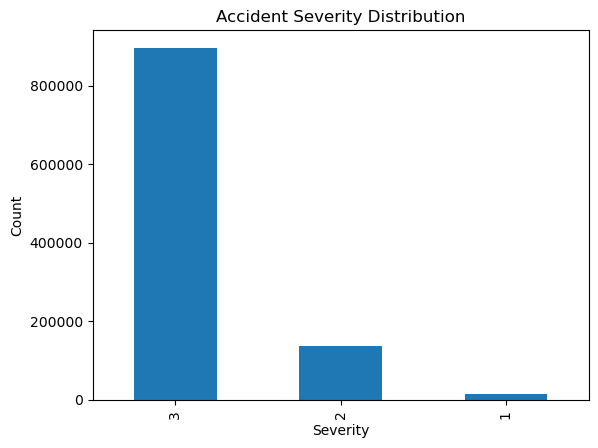

In [12]:
import matplotlib.pyplot as plt

severity_counts = data['Accident_Severity'].value_counts()
severity_counts.plot(kind='bar', title='Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()


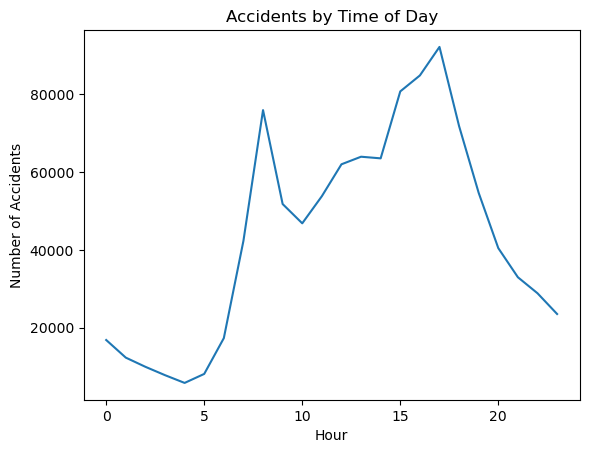

In [14]:

import pandas as pd
import matplotlib.pyplot as plt

data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')


data['Hour'] = data['Time'].dt.hour

data_cleaned = data.dropna(subset=['Hour'])

accidents_by_hour = data_cleaned.groupby('Hour').size()
accidents_by_hour.plot(kind='line', title='Accidents by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


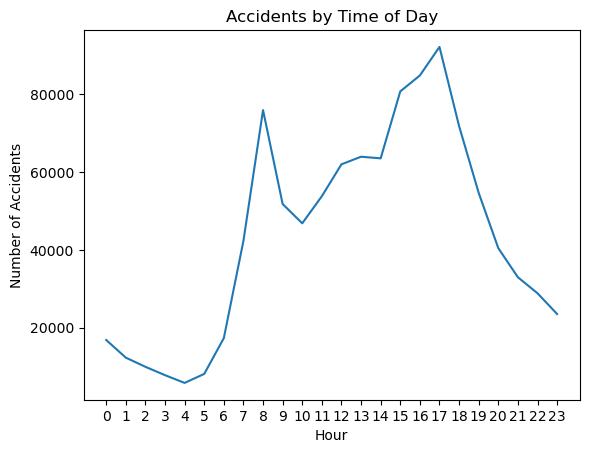

In [16]:

import matplotlib.pyplot as plt


data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour

accidents_by_hour = data.groupby('Hour').size()
accidents_by_hour.plot(kind='line', title='Accidents by Time of Day')

plt.xticks(range(0, 24))  # Set ticks for every hour (0 to 23)

plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


0    3
1    4
2    5
3    6
4    2
Name: Day_of_Week, dtype: int64


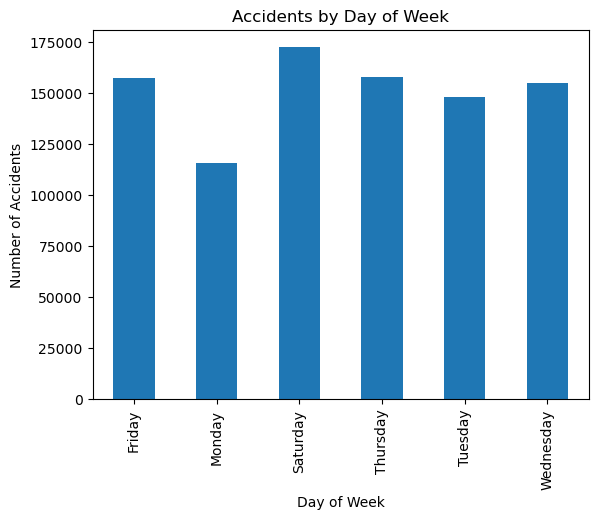

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('UK_Accident.csv')  
print(data['Day_of_Week'].head())


day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
data['Day_of_Week_Name'] = data['Day_of_Week'].map(day_names)

accidents_by_day = data.groupby('Day_of_Week_Name').size()

accidents_by_day.plot(kind='bar', title='Accidents by Day of Week')


plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')

plt.show()


In [6]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster


data = pd.read_csv('UK_Accident.csv')


print(data[['Latitude', 'Longitude']].isna().sum())

data_cleaned = data.dropna(subset=['Latitude', 'Longitude'])



data_sample = data_cleaned.head(100000)


base_map = folium.Map(location=[data_sample['Latitude'].mean(), data_sample['Longitude'].mean()], zoom_start=12)


marker_cluster = MarkerCluster().add_to(base_map)

for _, row in data_sample.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f"Accident Severity: {row['Accident_Severity']}<br>Time: {row['Time']}<br>Date: {row['Date']}"
    ).add_to(marker_cluster)

base_map.save('accident_map_with_cluster.html')

print("Map saved as 'accident_map_with_cluster.html'.")


Latitude       0
Longitude    101
dtype: int64
Map saved as 'accident_map_with_cluster.html'.


In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv('Cleaned_UK_Accident.csv')


data.drop(columns=['Unnamed: 0'], inplace=True)


data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)
data['Latitude'].fillna(data['Latitude'].mean(), inplace=True)
data['Speed_limit'].fillna(data['Speed_limit'].mean(), inplace=True)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday 


data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour


data = pd.get_dummies(data, columns=['Weather_Conditions', 'Road_Type', 'Day_of_Week', 'Light_Conditions'])


data.drop(columns=['Time', 'Date'], inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Longitude', 'Latitude', 'Speed_limit', 'Year', 'Month', 'Day', 'Weekday', 'Hour']] = scaler.fit_transform(data[['Longitude', 'Latitude', 'Speed_limit', 'Year', 'Month', 'Day', 'Weekday', 'Hour']])


data.head()


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_33177/3772244175.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)
/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_33177/3772244175.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,...,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,Day_of_Week_7,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present
0,200501BS00001,0.897880,-0.708421,2,1,1,-0.651384,Unknown,None within 50 metres,Zebra crossing,...,True,False,False,False,False,False,False,False,False,True
1,200501BS00002,0.883253,-0.688328,3,1,1,-0.651384,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,...,False,True,False,False,False,False,False,True,False,False
2,200501BS00003,0.886992,-0.684938,3,2,1,-0.651384,Unknown,None within 50 metres,No physical crossing within 50 meters,...,False,False,True,False,False,False,False,True,False,False
3,200501BS00004,0.910206,-0.712737,3,1,1,-0.651384,Unknown,None within 50 metres,No physical crossing within 50 meters,...,False,False,False,True,False,False,False,False,False,True
4,200501BS00005,0.922487,-0.704104,3,1,1,-0.651384,Unknown,None within 50 metres,No physical crossing within 50 meters,...,False,False,False,False,False,False,True,False,False,False
